# Braille Text Segmentation

## Installing packages

In [1]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


## Import packages

In [4]:
from imutils import paths
from skimage import io
from PIL import Image as im, ImageEnhance, ImageOps, ImageFilter, ImageDraw
from scipy.ndimage import interpolation as inter
from matplotlib import pyplot as plt
import cv2 as cv
import sys
import numpy as np

## Load Image Path

In [5]:
NSTrainPaths = list(paths.list_images("..\\Code\\bookPagesDataset\\1_raw\\1_raw\\jane_eyre\\vol1"))

In [6]:
NSTrainPaths

['..\\Code\\bookPagesDataset\\1_raw\\1_raw\\jane_eyre\\vol1\\IMG_2744.JPG',
 '..\\Code\\bookPagesDataset\\1_raw\\1_raw\\jane_eyre\\vol1\\IMG_2745.JPG',
 '..\\Code\\bookPagesDataset\\1_raw\\1_raw\\jane_eyre\\vol1\\IMG_2746.JPG',
 '..\\Code\\bookPagesDataset\\1_raw\\1_raw\\jane_eyre\\vol1\\IMG_2747.JPG',
 '..\\Code\\bookPagesDataset\\1_raw\\1_raw\\jane_eyre\\vol1\\IMG_2748.JPG',
 '..\\Code\\bookPagesDataset\\1_raw\\1_raw\\jane_eyre\\vol1\\IMG_2749.JPG',
 '..\\Code\\bookPagesDataset\\1_raw\\1_raw\\jane_eyre\\vol1\\IMG_2750.JPG',
 '..\\Code\\bookPagesDataset\\1_raw\\1_raw\\jane_eyre\\vol1\\IMG_2751.JPG',
 '..\\Code\\bookPagesDataset\\1_raw\\1_raw\\jane_eyre\\vol1\\IMG_2752.JPG',
 '..\\Code\\bookPagesDataset\\1_raw\\1_raw\\jane_eyre\\vol1\\IMG_2753.JPG',
 '..\\Code\\bookPagesDataset\\1_raw\\1_raw\\jane_eyre\\vol1\\IMG_2754.JPG',
 '..\\Code\\bookPagesDataset\\1_raw\\1_raw\\jane_eyre\\vol1\\IMG_2755.JPG',
 '..\\Code\\bookPagesDataset\\1_raw\\1_raw\\jane_eyre\\vol1\\IMG_2756.JPG',
 '..\\Code\\

## Preprocessing

### Sample on single image

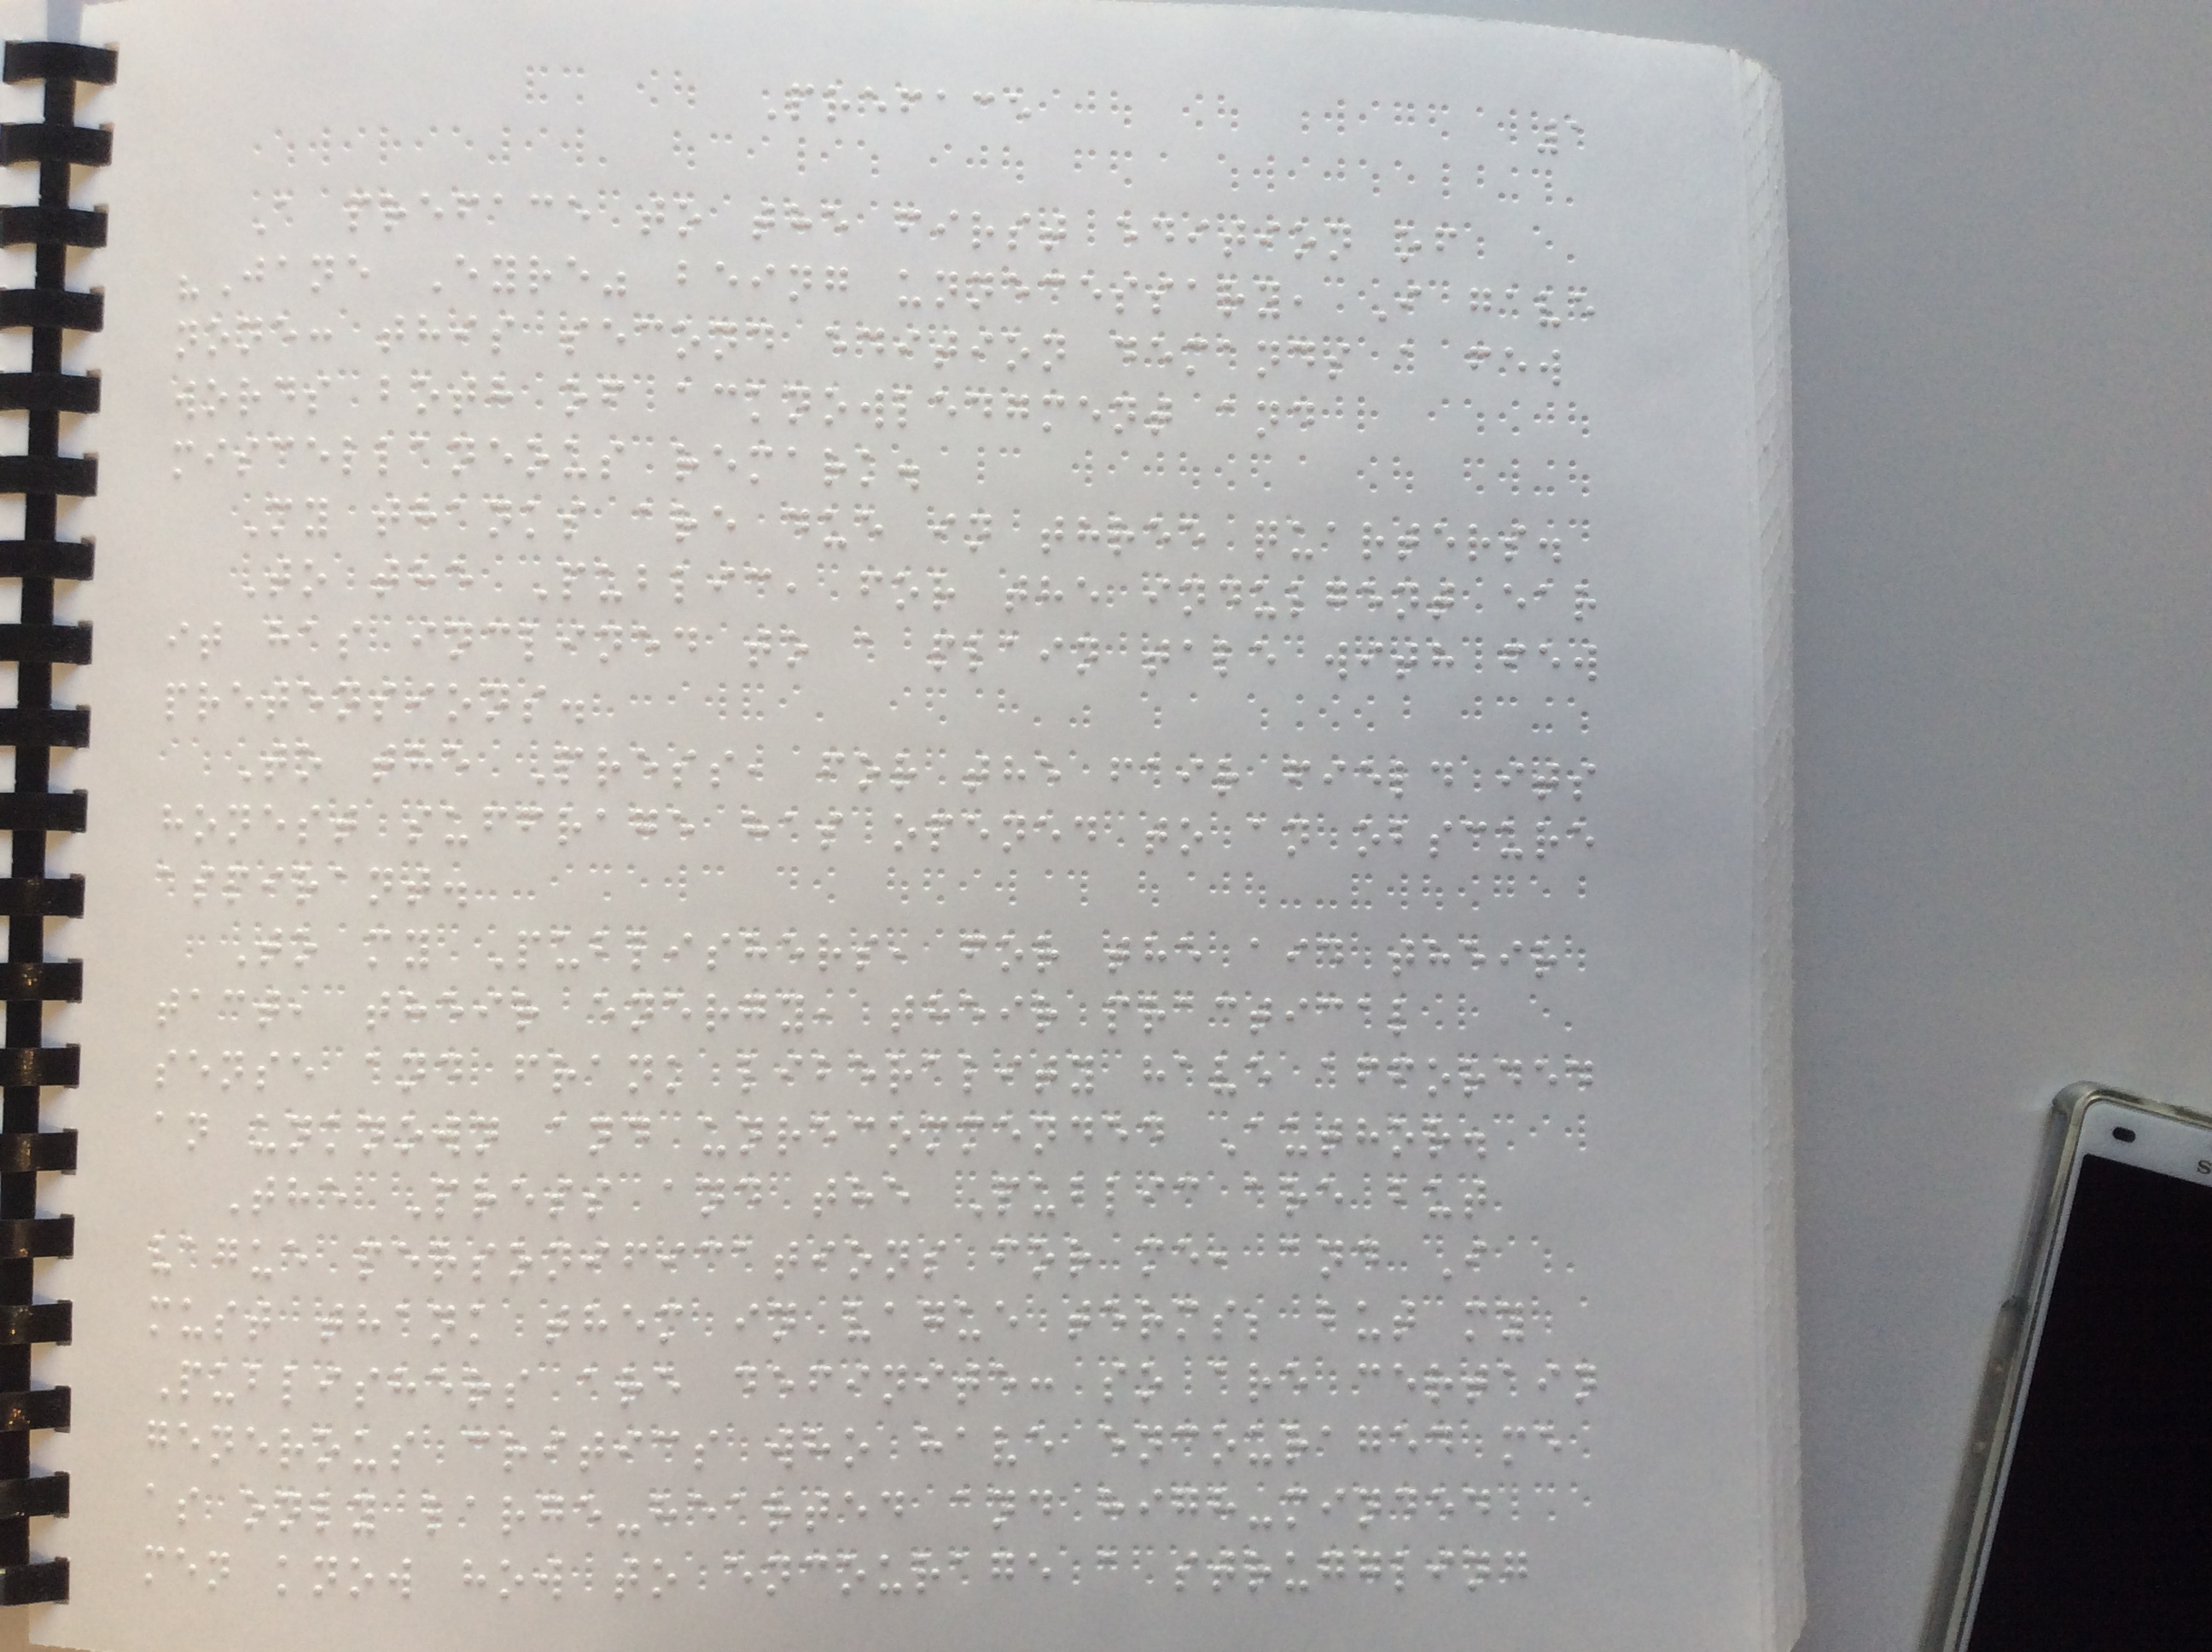

In [7]:
img = im.open(NSTrainPaths[0])
img


In [8]:

img.size

(2592, 1936)

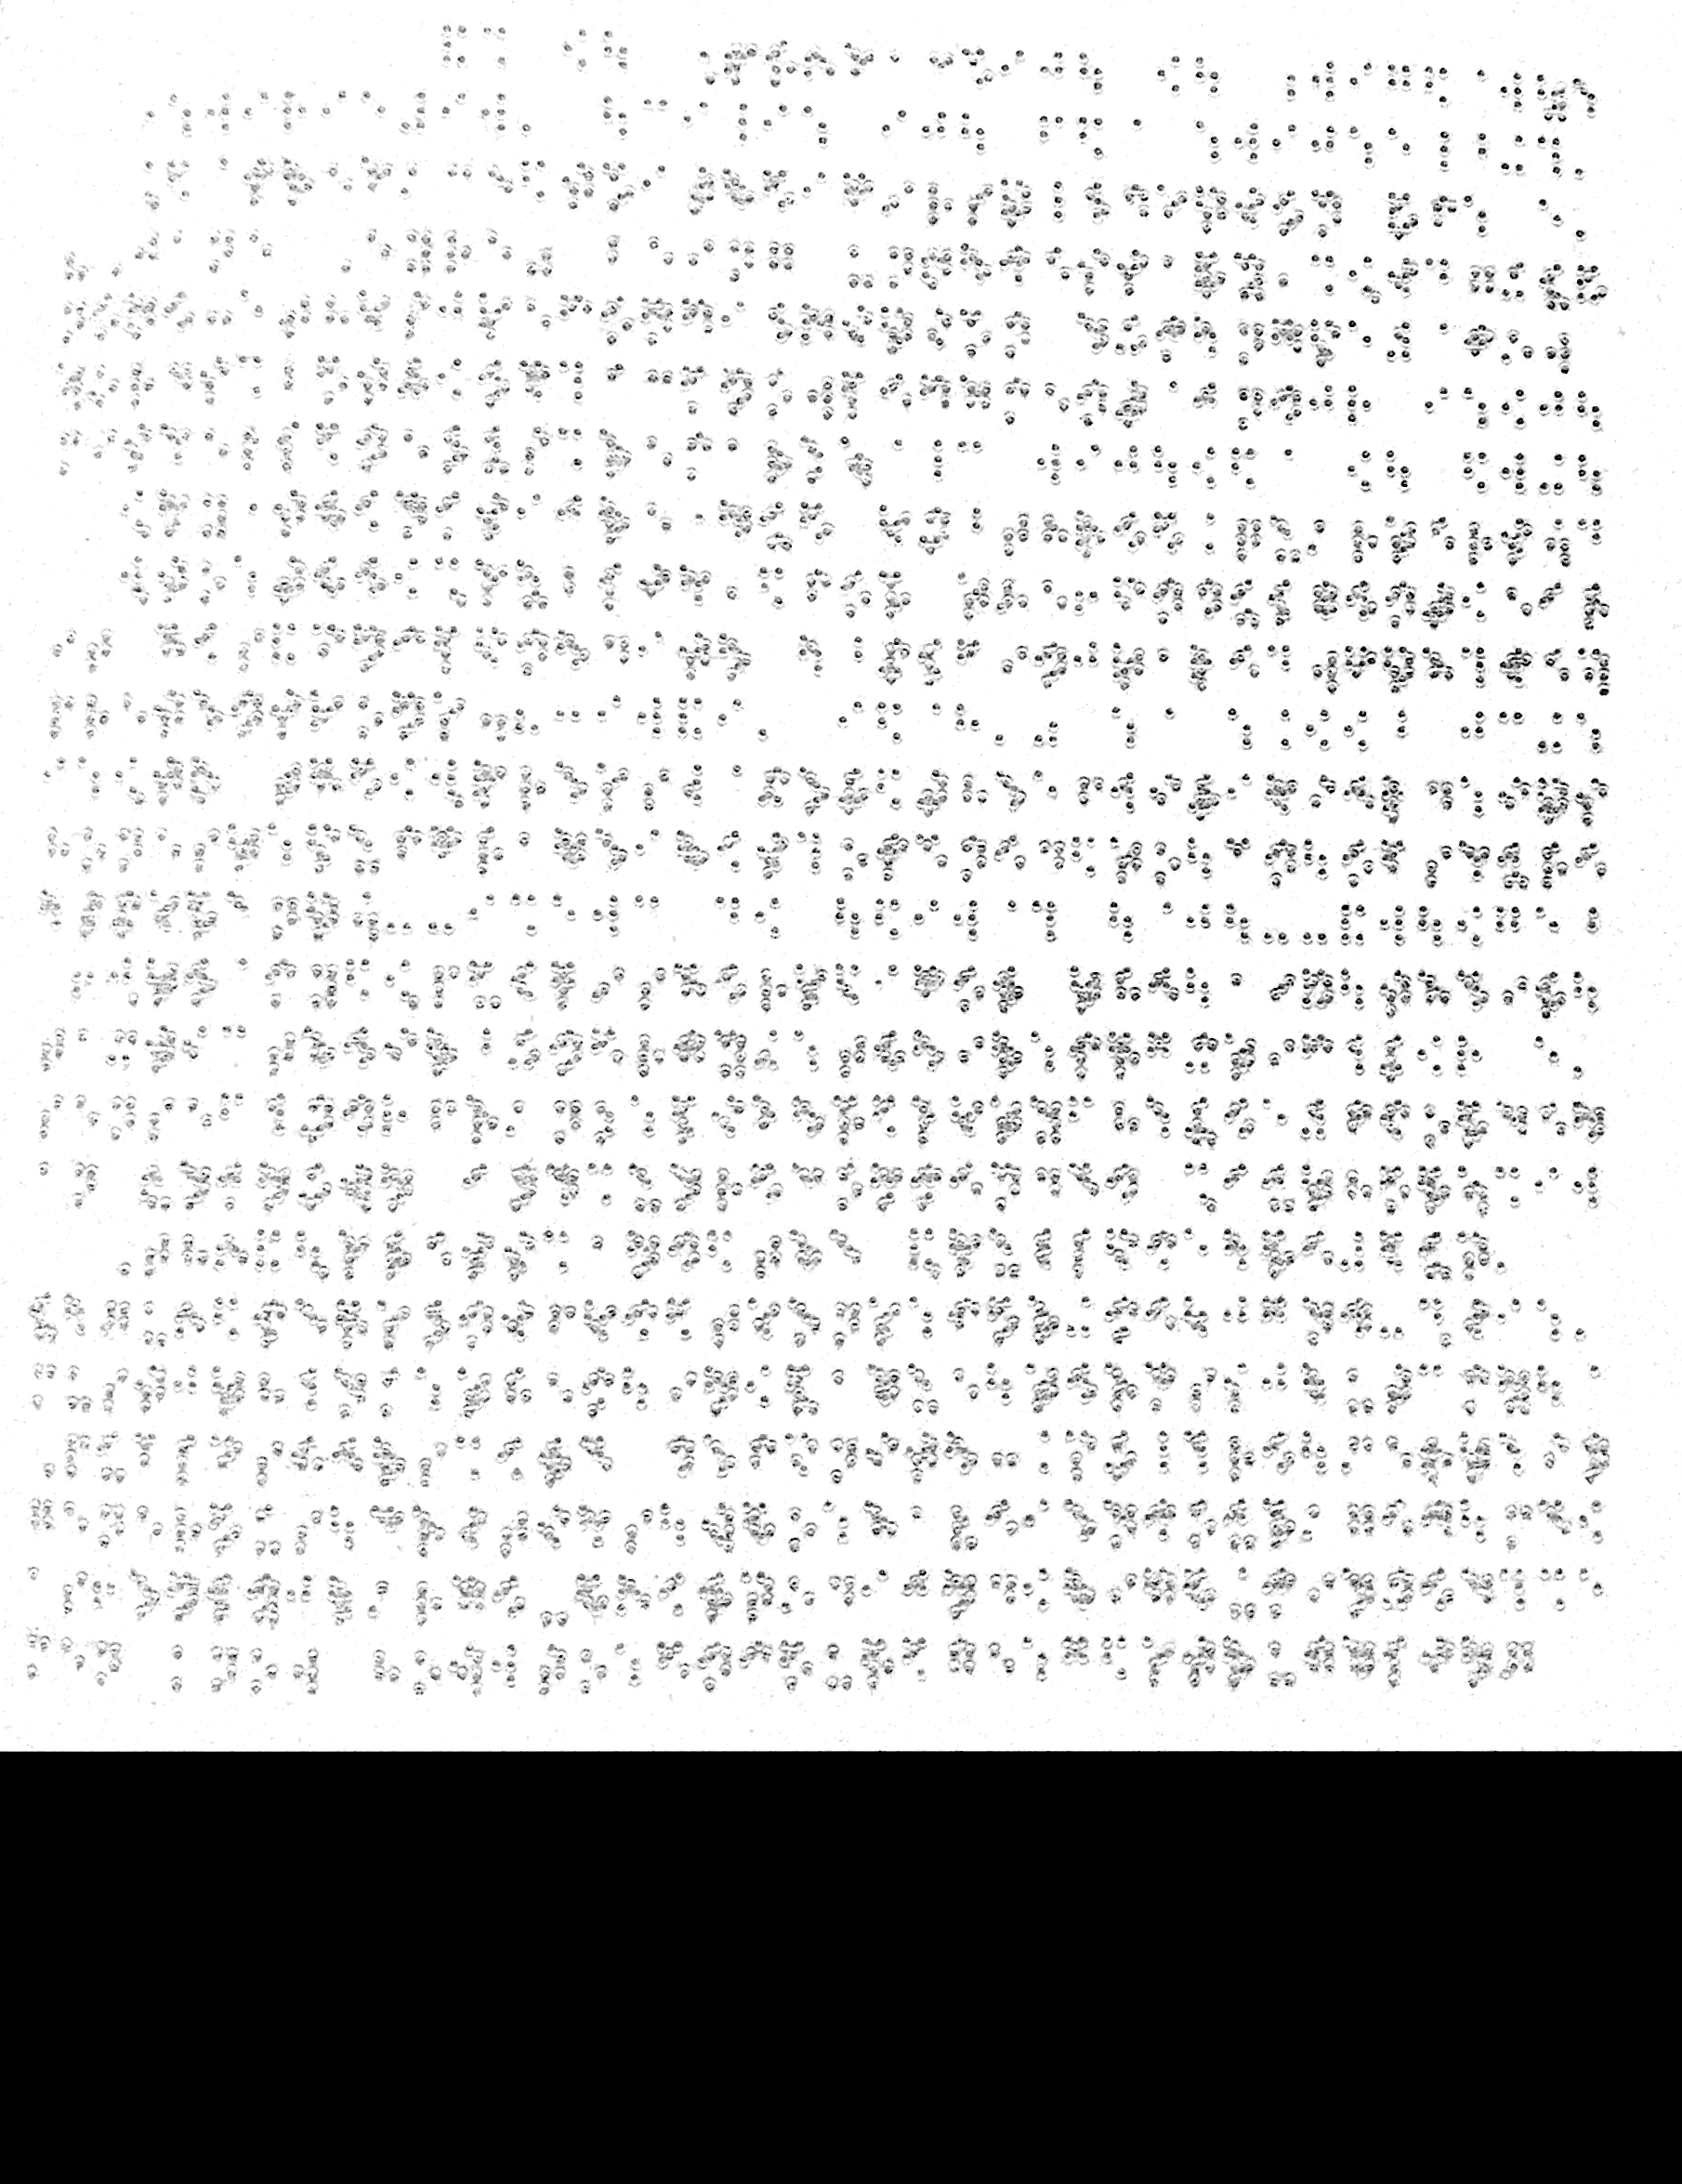

In [9]:
#Highlight text

#convert to grayscale
img = ImageOps.grayscale(img)

#contour
img = img.filter(ImageFilter.CONTOUR) 

#smoothening
img = img.filter(ImageFilter.SMOOTH) 

#increase contrast
enhancer = ImageEnhance.Contrast(img)
factor = 8 #increase contrast
img = enhancer.enhance(factor)
img

#median filter 
img = img.filter(ImageFilter.MedianFilter(size = 3)) 

#crop to only text
img = img.crop((140, 50, 1950, 2400))
img

## Segmenting into lines

### Erosion

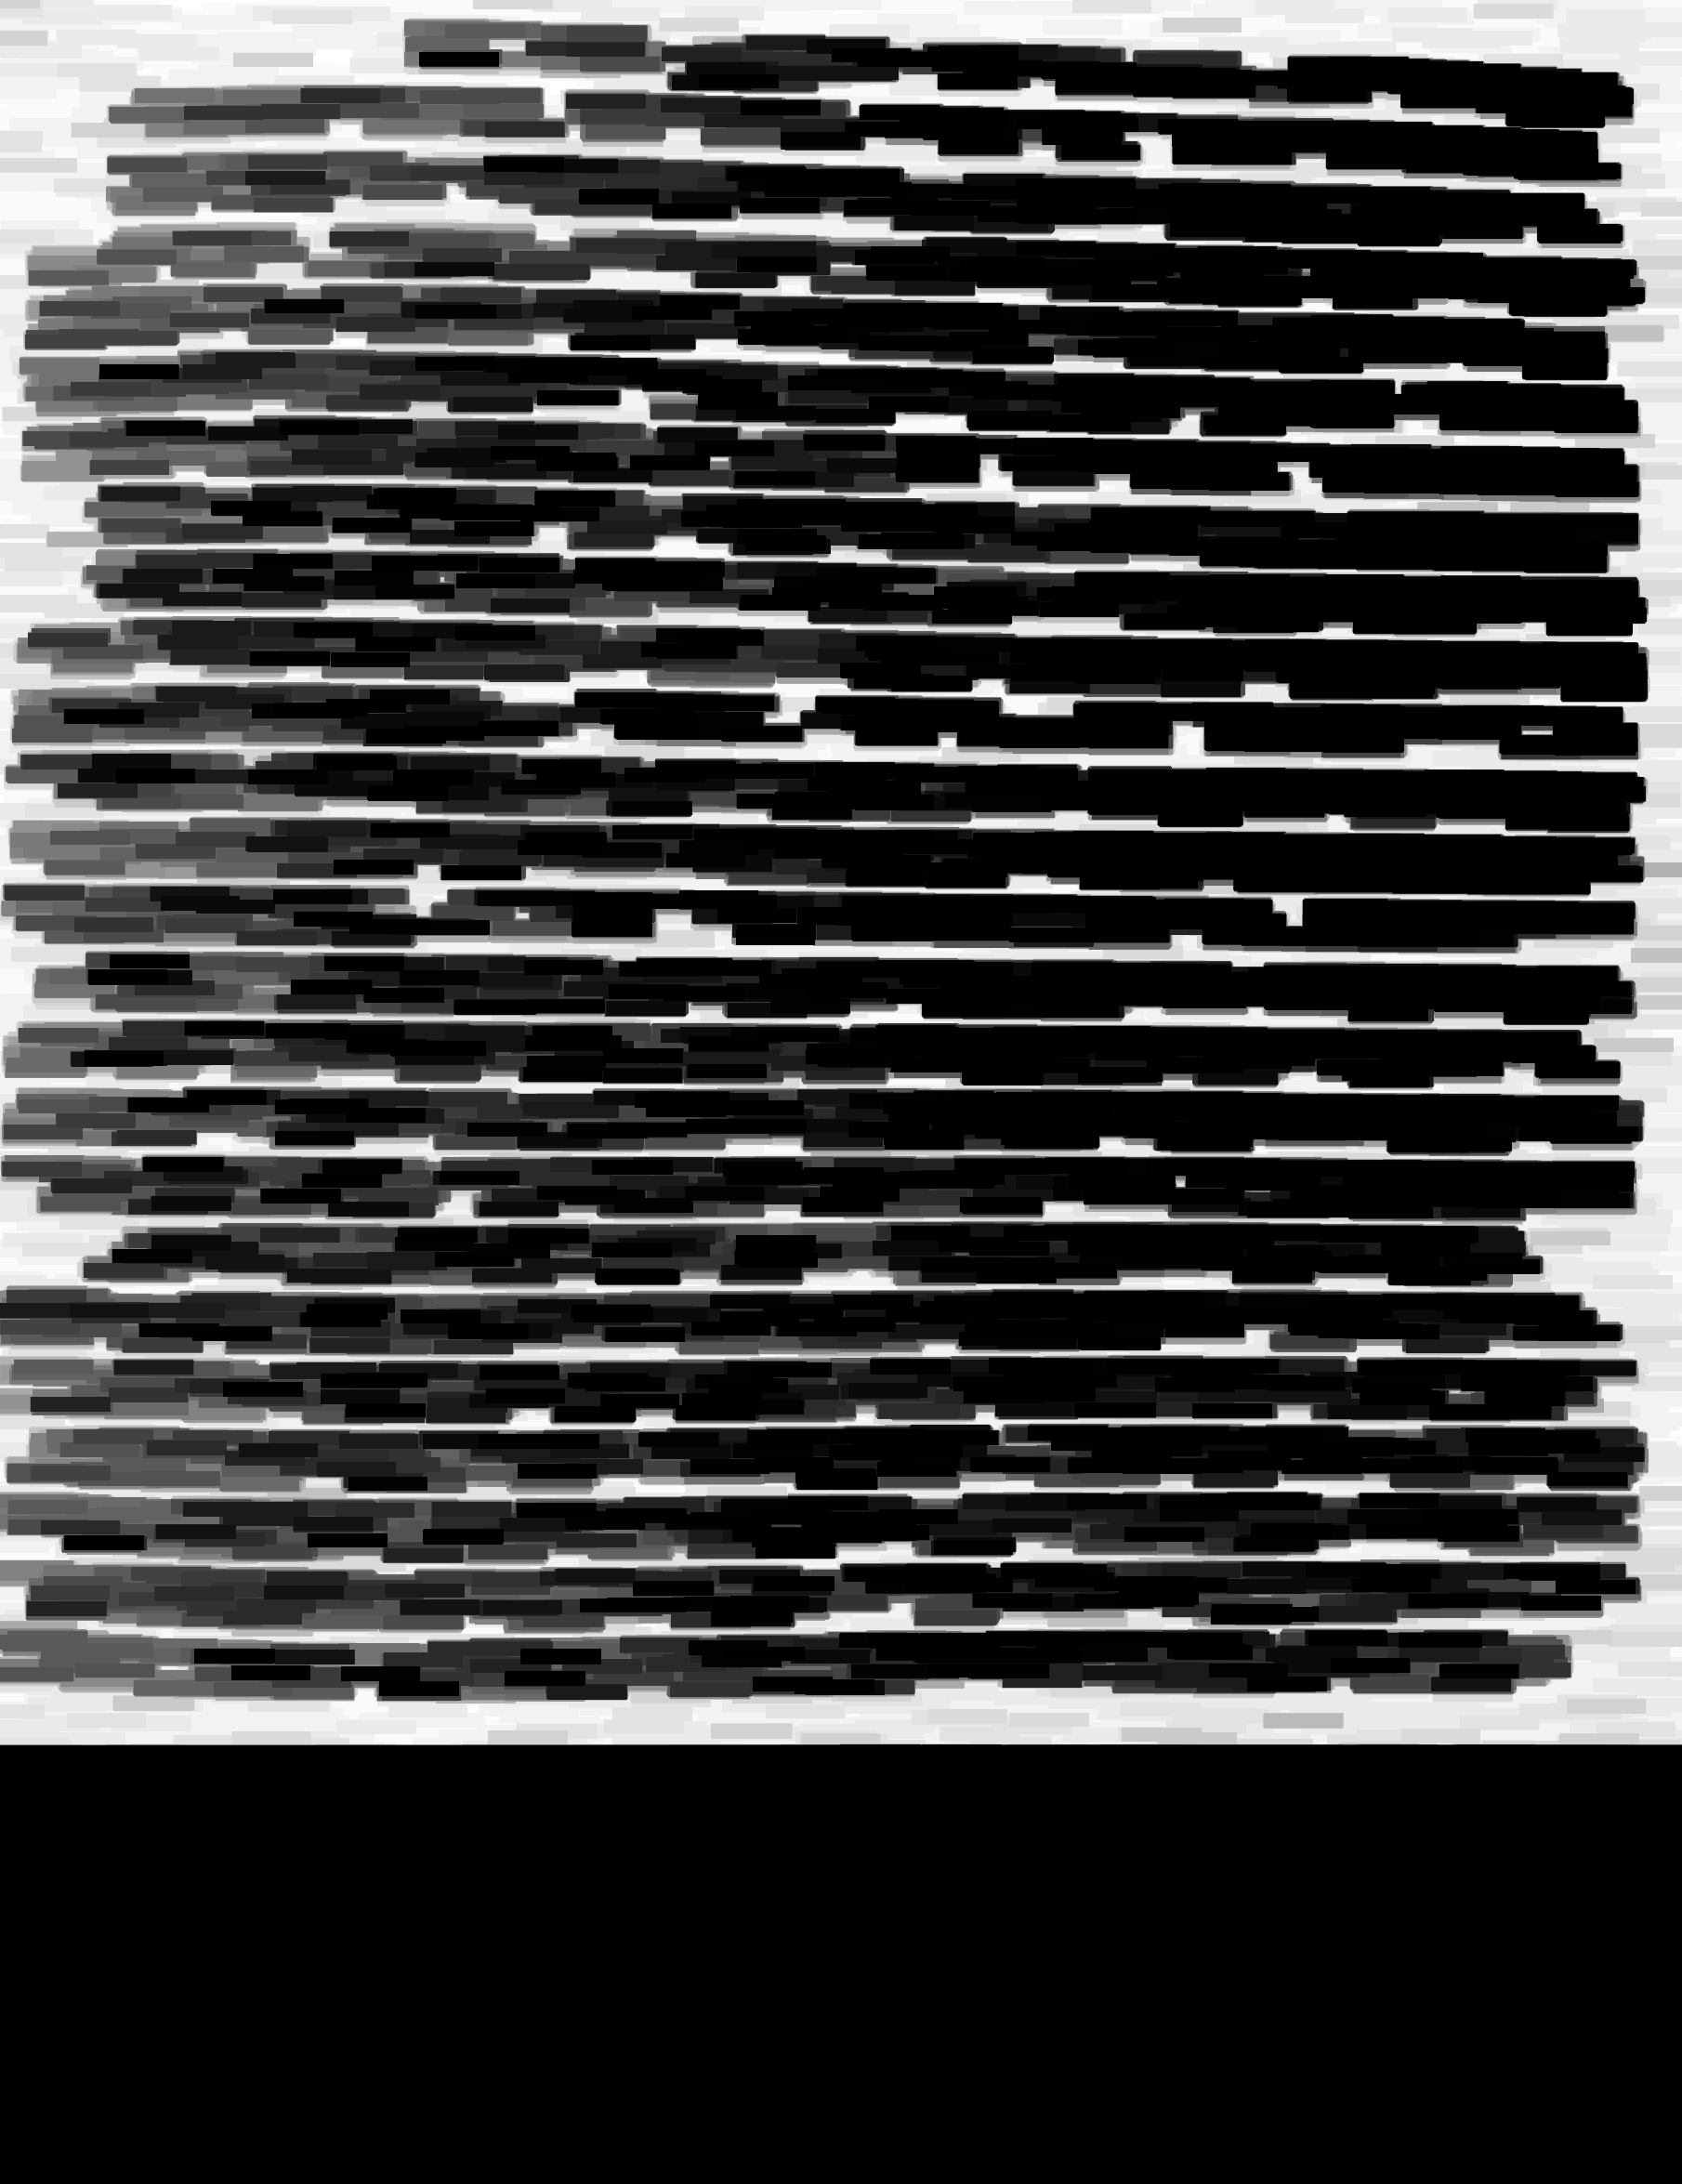

In [10]:
kernel = np.ones((3, 13), np.uint8)
img_dilation = im.fromarray(cv.erode(np.array(img), kernel, iterations=7))
img_dilation

### Binarize Image

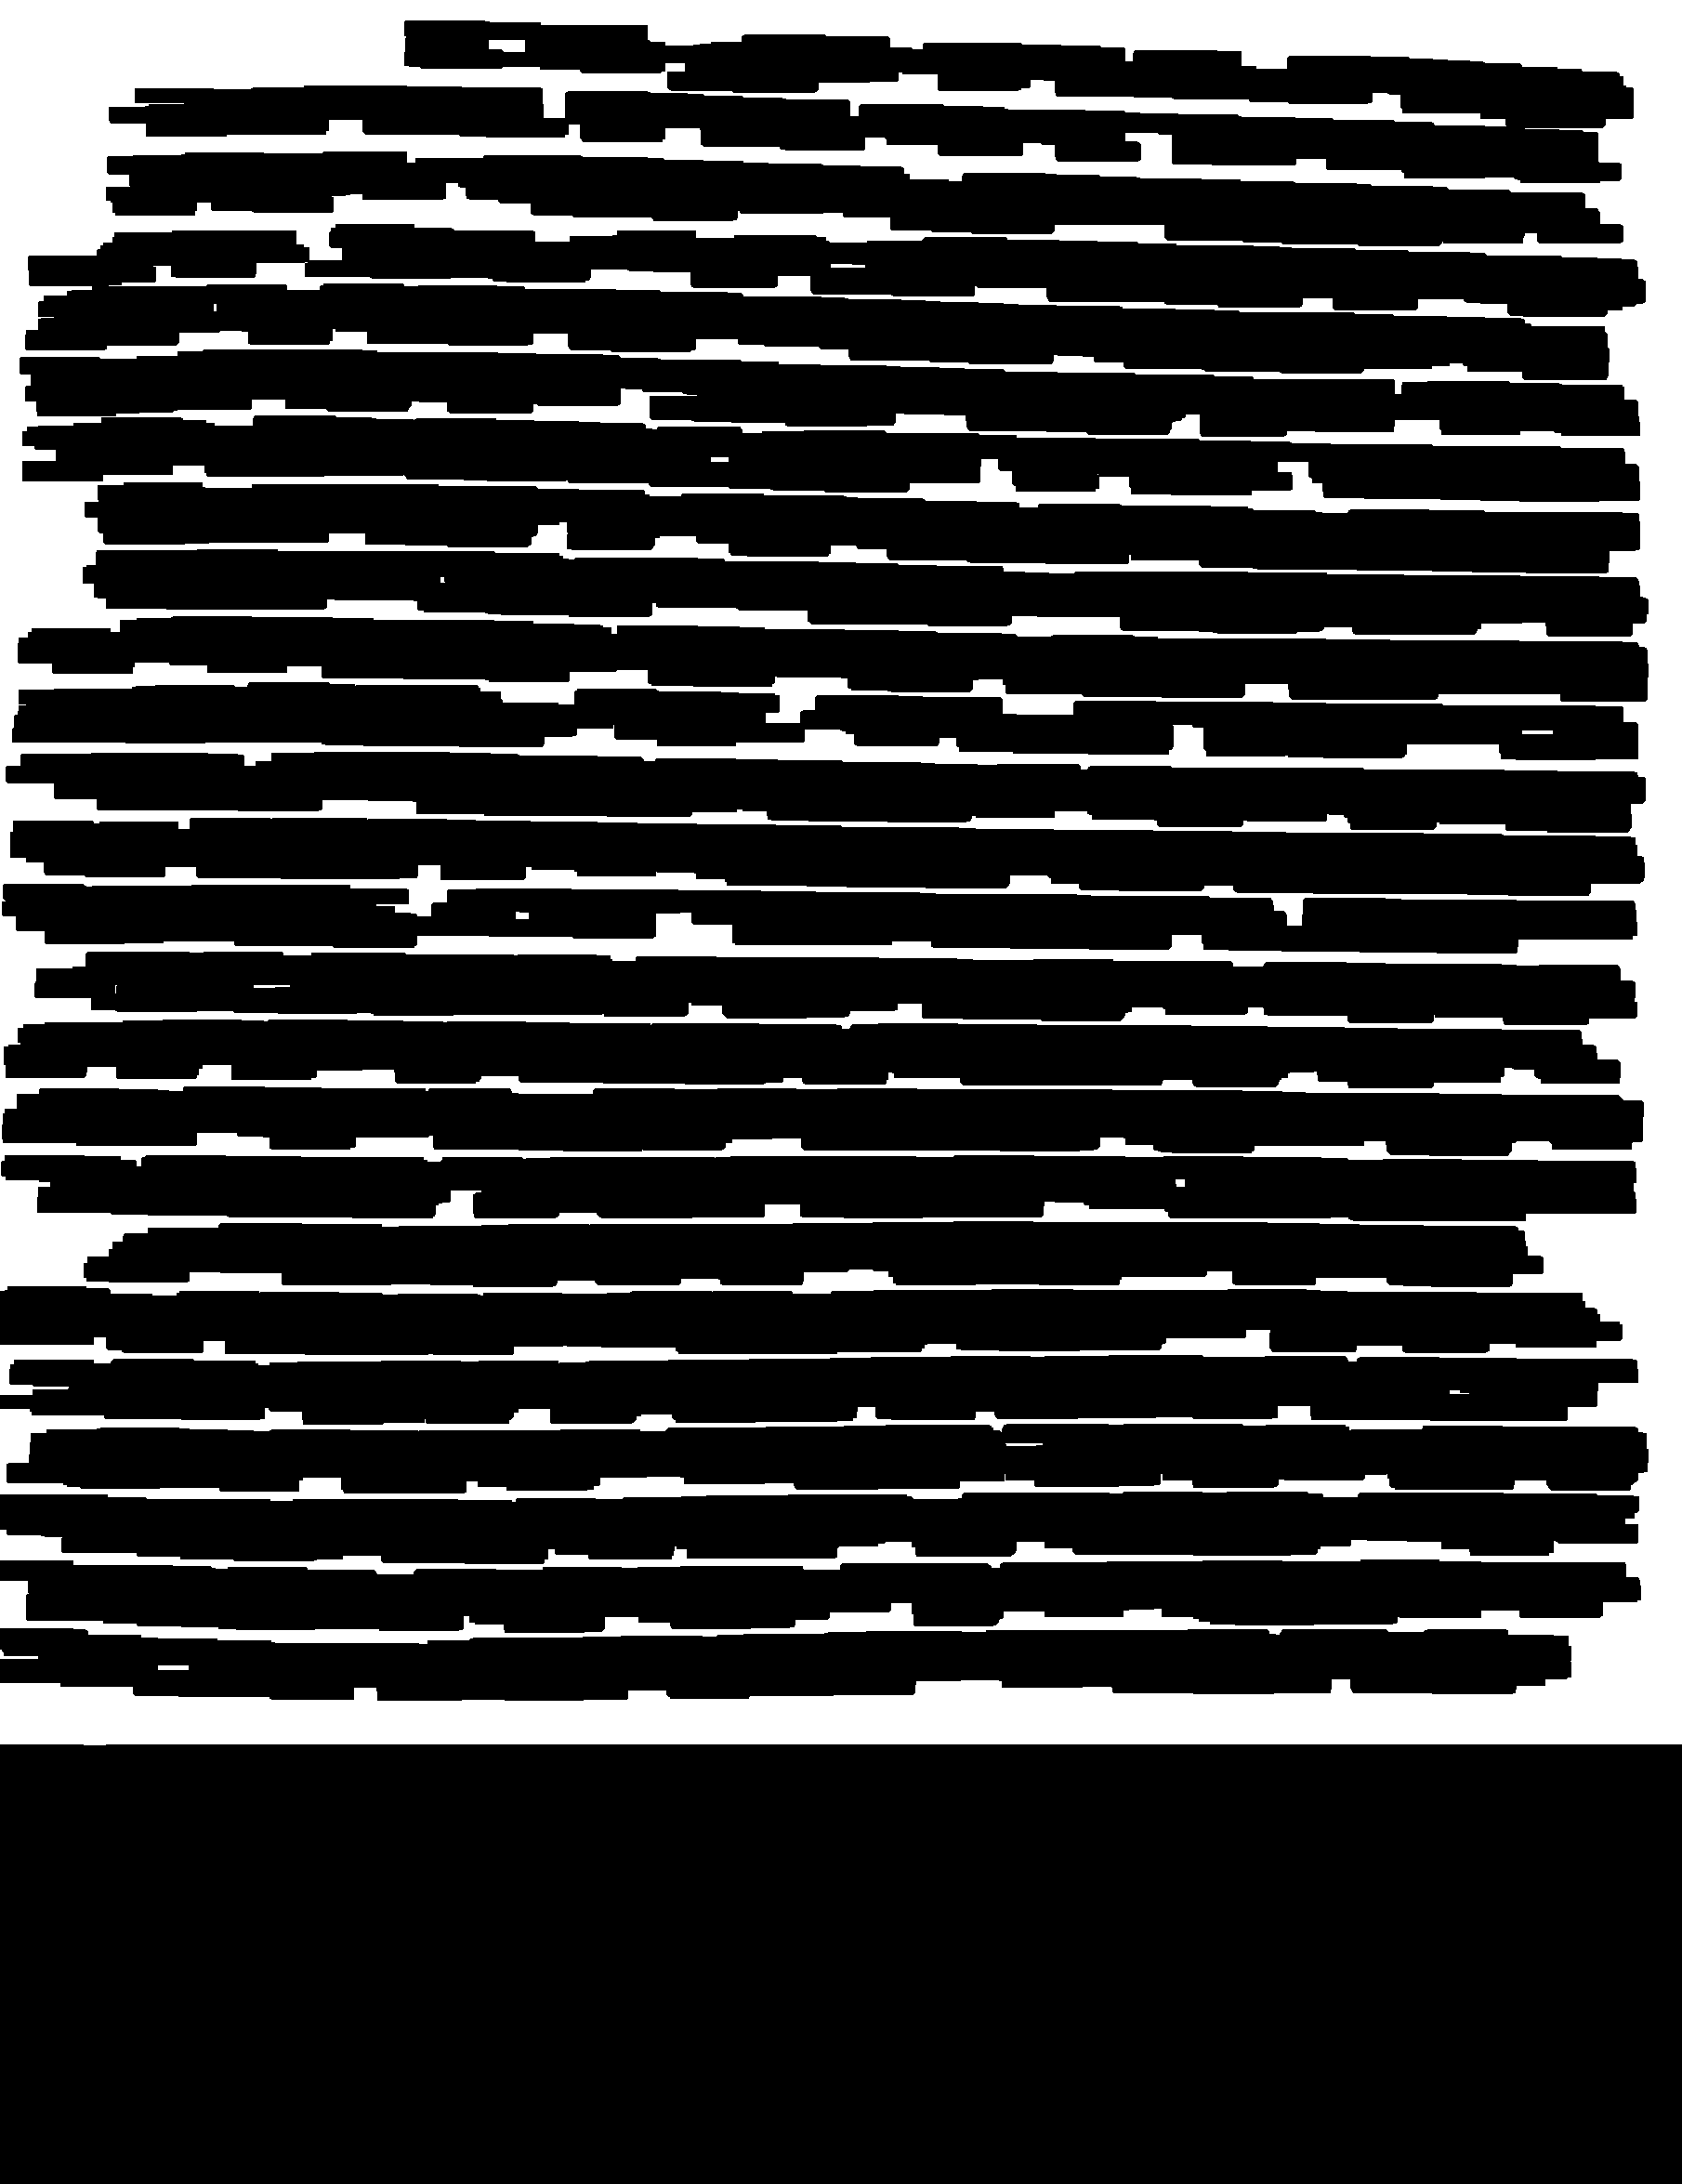

In [11]:
# Threshold
img2 = img_dilation.point( lambda p: 255 if p > 150 else 0 )
# To mono
img2 = img2.convert('1')
img2

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


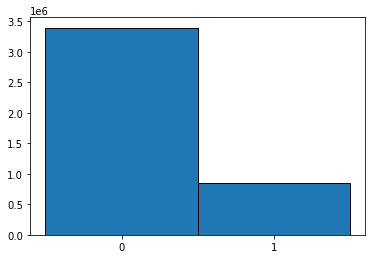

In [12]:
from matplotlib import pyplot as plt
img3 = np.array(img2)
plt.hist(img3.flatten(), bins=[-.5,.5,1.5], ec="k")
plt.xticks((0,1))
plt.show()

In [13]:
h, w = img2.size
line_height=0
flag=0

for i in range(h):
    for j in range(w):
        if(img2.getpixel((i,j)) == 0):
            start = [i,j]
            for k in range(i,h):
                line_height=line_height+1
                if(img2.getpixel((k,j))==255):
                    flag=1
                    break
            if(flag==1):
                break
    if(flag==1):
        break;

In [14]:
start

[0, 1389]

In [15]:
line_height

120

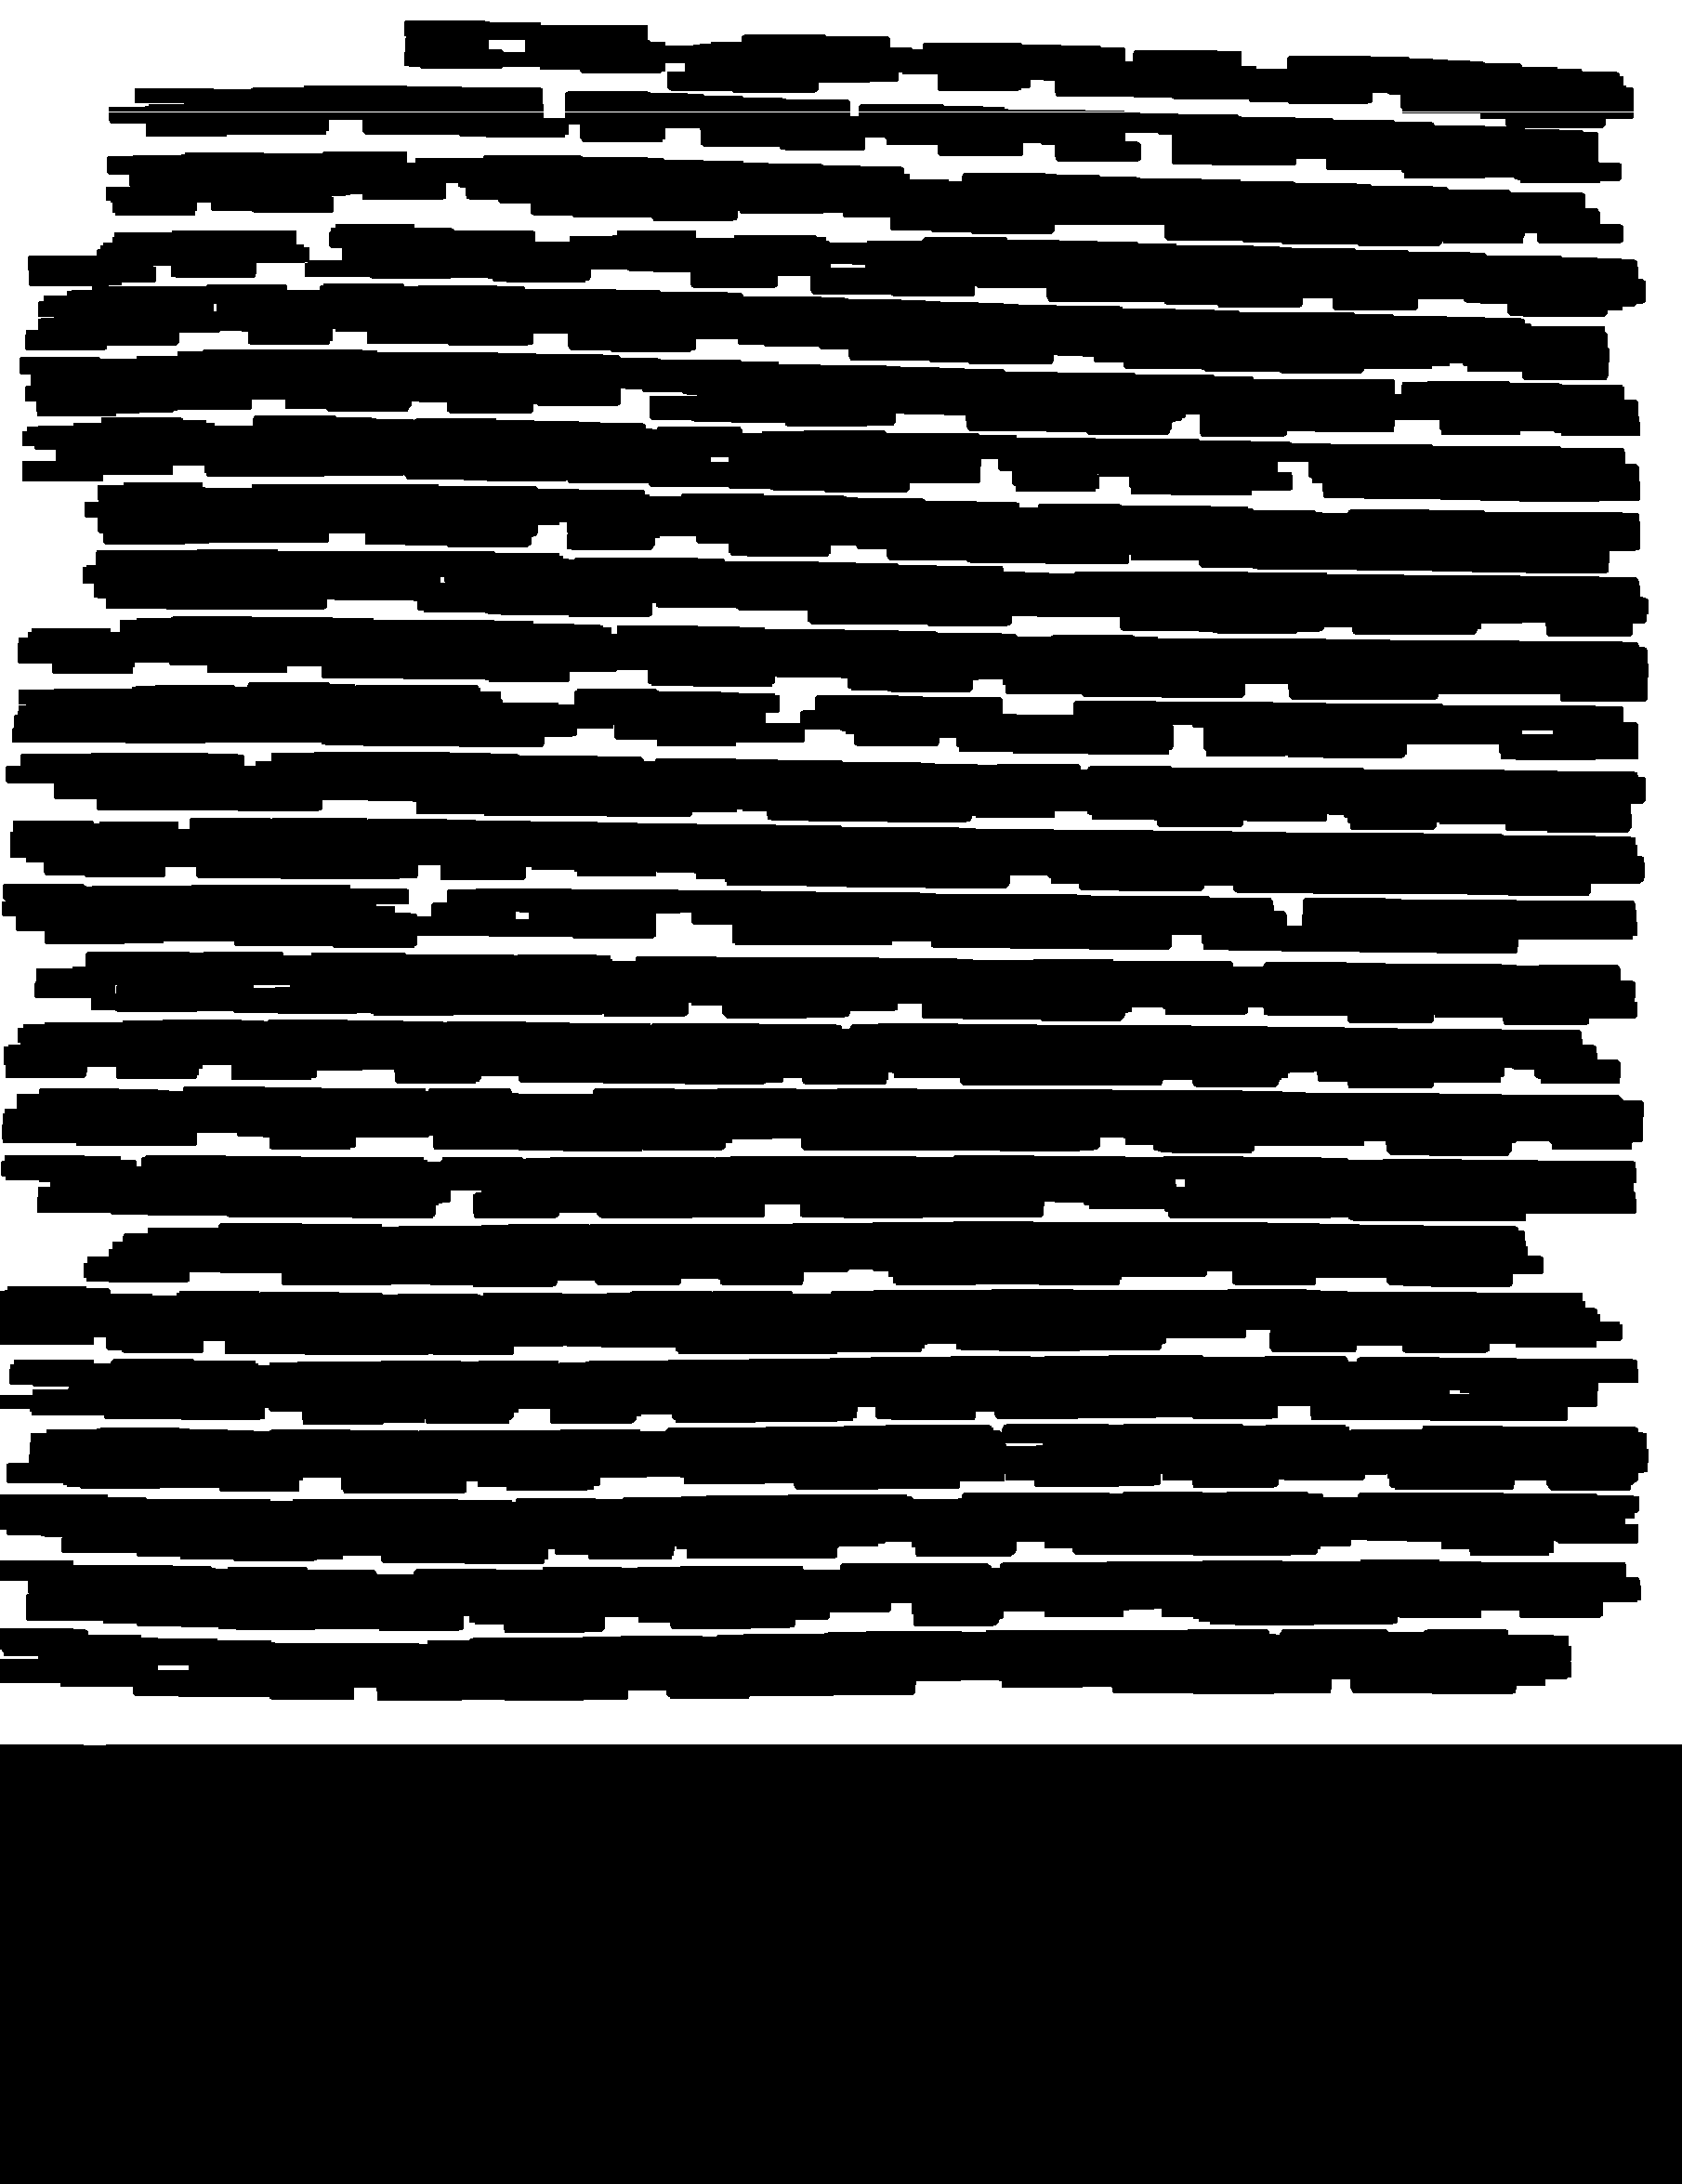

In [16]:

shape = [(0, 120), (w,120)]
ImageDraw.Draw(img2).line(shape, fill ="red", width = 0)
img2

### Array of lines

In [17]:
#select ROIs function
ROIs = cv.selectROIs("Select Rois",np.array(img2))

#print rectangle points of selected roi
print(ROIs)

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'selectROIs'
> Overload resolution failed:
>  - img data type = 0 is not supported
>  - Expected Ptr<cv::UMat> for argument 'img'
